<a href="https://www.kaggle.com/code/francescoliveras/ps-s3-e20-eda-model-en-es?scriptVersionId=139395418" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


# <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#37FABC; font-size:160%; text-align:center;padding: 0px; border-bottom: 5px solid #407A68">PlayGround Series S3 E20 EDA and simple model</p>

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 5px solid #008F77">Intro</p>

**🟦EN**:
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em; color:#5361fc;">
This Kaggle workbook aims to provide a comprehensive exploratory data analysis (EDA) and a set of simple models (which will not be optimized), but which can give a vague idea of how to choose the best model for the given data set, with the ultimate goal of making decisions.
Through this EDA, we will be able to get a deeper understanding of the structure of the data, the values that have a relationship between them and the missing values and pattern or outliers that may affect when performing the modeling or selecting the model we want to use for prediction/recommendation. By performing an EDA, we can identify potential pitfalls and make the decisions and subsequent processing necessary to improve the performance and accuracy of the models.
</div>

**🟥ES**: 
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em; background-color: #c9b1fa; color:#38196e;">
Este cuaderno Kaggle tiene el objetivo proporcionar un análisis exploratorio de datos (AED) exhaustivo y un conjunto de modelos simples (los cuales no estarán optimizados), pero que pueden llegar a dar una vaga idea para escoger el mejor modelo, para el conjunto de datos dado, con el objetivo final de tomar decisiones.

A través de este AED, podremos obtener una comprensión más profunda de la estructura de los datos, los valores que tiene una relación entre ellos y los valores que faltan y patrón o valores anómalos que pueda afectar a la hora de realizar el modelado o seleccionar el modelo que queremos utilizar para la predicción / recomendación. Al realizar un EDA, podemos identificar posibles obstáculos y tomar las decisiones, y posteriormente el procesado necesario para mejorar el rendimiento y la precisión de los modelos.
</div>

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Data information</p>

**🟦EN**:

The objective of this challenge is to create machine learning models that use open-source emissions data (from Sentinel-5P satellite observations) to predict carbon emissions.

Approximately 497 unique locations were selected from multiple areas in Rwanda, with a distribution around farm lands, cities and power plants. The data for this competition is split by time; the years 2019 - 2021 are included in the training data, and your task is to predict the CO2 emissions data for 2022 through November.

Seven main features were extracted weekly from Sentinel-5P from January 2019 to November 2022. Each feature (Sulphur Dioxide, Carbon Monoxide, etc) contain sub features such as column_number_density which is the vertical column density at ground level, calculated using the DOAS technique. You can read more about each feature in the below links, including how they are measured and variable definitions. You are given the values of these features in the test set and your goal to predict CO2 emissions using time information as well as these features.

* Sulphur Dioxide - COPERNICUS/S5P/NRTI/L3_SO2
* Carbon Monoxide - COPERNICUS/S5P/NRTI/L3_CO
* Nitrogen Dioxide - COPERNICUS/S5P/NRTI/L3_NO2
* Formaldehyde - COPERNICUS/S5P/NRTI/L3_HCHO
* UV Aerosol Index - COPERNICUS/S5P/NRTI/L3_AER_AI
* Ozone - COPERNICUS/S5P/NRTI/L3_O3
* Cloud - COPERNICUS/S5P/OFFL/L3_CLOUD

*Files*

* ```train.csv``` - the training set
* ```test.csv``` - the test set; your task is to predict the emission target for each week at each location
* ```sample_submission.csv``` - a sample submission file in the correct format




**🟥ES**:

El objetivo de este reto es crear modelos de aprendizaje automático que utilicen datos de emisiones de código abierto (procedentes de observaciones por satélite Sentinel-5P) para predecir las emisiones de carbono.

Se seleccionaron aproximadamente 497 ubicaciones únicas de múltiples zonas de Ruanda, con una distribución en torno a tierras de cultivo, ciudades y centrales eléctricas. Los datos para esta competición se dividen por tiempo; los años 2019 - 2021 se incluyen en los datos de entrenamiento, y su tarea es predecir los datos de emisiones de CO2 para 2022 hasta noviembre.

Se extrajeron siete características principales semanalmente de Sentinel-5P desde enero de 2019 hasta noviembre de 2022. Cada característica (dióxido de azufre, monóxido de carbono, etc.) contiene subcaracterísticas como column_number_density, que es la densidad de columna vertical a nivel del suelo, calculada mediante la técnica DOAS. Puede obtener más información sobre cada característica en los enlaces siguientes, incluido cómo se miden y las definiciones de las variables. Se le dan los valores de estas características en el conjunto de pruebas y su objetivo es predecir las emisiones de CO2 utilizando información temporal, así como estas características.

* Dióxido de azufre - COPERNICUS/S5P/NRTI/L3_SO2
* Monóxido de carbono - COPERNICUS/S5P/NRTI/L3_CO
* Dióxido de nitrógeno - COPERNICUS/S5P/NRTI/L3_NO2
* Formaldehído - COPERNICUS/S5P/NRTI/L3_HCHO
* Índice de aerosol UV - COPERNICUS/S5P/NRTI/L3_AER_AI
* Ozono - COPERNICUS/S5P/NRTI/L3_O3
* Nube - COPERNICUS/S5P/OFFL/L3_CLOUD

Archivos

* ```train.csv``` - el conjunto de entrenamiento
* ```test.csv``` - el conjunto de pruebas; su tarea consiste en predecir el objetivo de emisiones para cada semana en cada ubicación.
* ```sample_submission.csv``` - un archivo de envío de muestra en el formato correcto.

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Library import</p>

In [1]:
import os 
import sys
import math
import time
import random
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import missingno as msno
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.colors as mcolors

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Put theme of notebook 
from colorama import Fore, Style

# Colors
red = Fore.RED + Style.BRIGHT
mgta = Fore.MAGENTA + Style.BRIGHT
yllw = Fore.YELLOW + Style.BRIGHT
cyn = Fore.CYAN + Style.BRIGHT
blue = Fore.BLUE + Style.BRIGHT

# Reset
res = Style.RESET_ALL
plt.style.use({"figure.facecolor": "#282a36"})

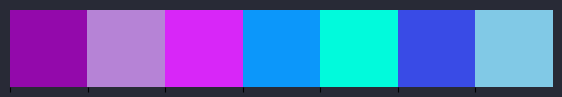

In [3]:
# Colors
YELLOW = "#F7C53E"

CYAN_G = "#0CF7AF"
CYAB_DARK = "#11AB7C"

PURPLE = "#D826F8"
PURPLE_DARJ = "#9309AB"
PURPLE_L = "#b683d6"

BLUE = "#0C97FA"
RED = "#FA1D19"
ORANGE = "#FA9F19"
GREEN = "#0CFA58"
LIGTH_BLUE = "#01FADC"
S_BLUE = "#81c9e6"
DARK_BLUE = "#394be6"
# Palettes
PALETTE_2 = [CYAN_G, PURPLE]
PALETTE_3 = [YELLOW, CYAN_G, PURPLE]
PALETTE_4 = [YELLOW, ORANGE, PURPLE, LIGTH_BLUE]
PALETTE_5 = [PURPLE_DARJ, PURPLE_L, PURPLE, BLUE, LIGTH_BLUE]
PALETTE_6 = [BLUE, RED, ORANGE, GREEN, LIGTH_BLUE, PURPLE]

# Vaporwave palette by Francesc Oliveras
PALETTE_7 = [PURPLE_DARJ, PURPLE_L, PURPLE, BLUE, LIGTH_BLUE, DARK_BLUE, S_BLUE]
PALETTE_7_C = [PURPLE_DARJ, BLUE, PURPLE, LIGTH_BLUE, PURPLE_L, S_BLUE, DARK_BLUE]
INCLUDE_ORIGINAL = True
SEED = 42
N_SPLITS = 7
sns.palplot(sns.color_palette(PALETTE_7))

# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

cmap = mcolors.LinearSegmentedColormap.from_list("", PALETTE_2)
cmap_2 = mcolors.LinearSegmentedColormap.from_list("", [S_BLUE, PURPLE_DARJ])

font_family = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=10), width=1000, height=500))

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Constants</p>

In [4]:
PATH = "/kaggle/input/playground-series-s3e20"
TEST_FILENAME = "test.csv"
TRAIN_FILENAME = "train.csv"
SUBMISSION_FILENAME = "sample_submission.csv"

TRAIN_DIR = os.path.join(PATH, TRAIN_FILENAME)
TEST_DIR = os.path.join(PATH, TEST_FILENAME)
SUBMISSION_DIR = os.path.join(PATH, SUBMISSION_FILENAME)

SULPHUR_COLS = ['SulphurDioxide_SO2_column_number_density',
                  'SulphurDioxide_SO2_column_number_density_amf',
                  'SulphurDioxide_SO2_slant_column_number_density',
                  'SulphurDioxide_cloud_fraction',
                  'SulphurDioxide_sensor_azimuth_angle',
                  'SulphurDioxide_sensor_zenith_angle',
                  'SulphurDioxide_solar_azimuth_angle',
                  'SulphurDioxide_solar_zenith_angle', 'emission']

OZONE_COLS = ['Ozone_O3_column_number_density',
                  'Ozone_O3_column_number_density_amf',
                  'Ozone_O3_slant_column_number_density',
                  'Ozone_O3_effective_temperature',
                  'Ozone_cloud_fraction',
                  'Ozone_sensor_azimuth_angle',
                  'Ozone_sensor_zenith_angle',
                  'Ozone_solar_azimuth_angle',
                  'Ozone_solar_zenith_angle', 'emission']


CARBON_COLS = ['CarbonMonoxide_CO_column_number_density',
                  'CarbonMonoxide_H2O_column_number_density',
                  'CarbonMonoxide_cloud_height',
                  'CarbonMonoxide_sensor_altitude',
                  'CarbonMonoxide_sensor_azimuth_angle',
                  'CarbonMonoxide_sensor_zenith_angle',
                  'CarbonMonoxide_solar_azimuth_angle',
                  'CarbonMonoxide_solar_zenith_angle', 'emission']


FORMALDEHYDE_COLS = ['Formaldehyde_tropospheric_HCHO_column_number_density',
                      'Formaldehyde_tropospheric_HCHO_column_number_density_amf',
                      'Formaldehyde_HCHO_slant_column_number_density',
                      'Formaldehyde_cloud_fraction',
                      'Formaldehyde_solar_zenith_angle',
                      'Formaldehyde_solar_azimuth_angle',
                      'Formaldehyde_sensor_zenith_angle',
                      'Formaldehyde_sensor_azimuth_angle', 'emission']

CLOUD_COLS = ['Cloud_cloud_fraction',
                  'Cloud_cloud_top_pressure',
                  'Cloud_cloud_top_height',
                  'Cloud_cloud_base_pressure',
                  'Cloud_cloud_base_height',
                  'Cloud_cloud_optical_depth',
                  'Cloud_surface_albedo',
                  'Cloud_sensor_azimuth_angle',
                  'Cloud_sensor_zenith_angle',
                  'Cloud_solar_azimuth_angle',
                  'Cloud_solar_zenith_angle', 'emission']

NITROGEN_COLS = ['NitrogenDioxide_NO2_column_number_density',
                  'NitrogenDioxide_tropospheric_NO2_column_number_density',
                  'NitrogenDioxide_stratospheric_NO2_column_number_density',
                  'NitrogenDioxide_NO2_slant_column_number_density',
                  'NitrogenDioxide_tropopause_pressure',
                  'NitrogenDioxide_absorbing_aerosol_index',
                  'NitrogenDioxide_cloud_fraction',
                  'NitrogenDioxide_sensor_altitude',
                  'NitrogenDioxide_sensor_azimuth_angle',
                  'NitrogenDioxide_sensor_zenith_angle',
                  'NitrogenDioxide_solar_azimuth_angle',
                  'NitrogenDioxide_solar_zenith_angle', 'emission']

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Functions</p>

In [5]:
def show_corr_heatmap(df, title):
    
    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize = (15, 10))
    plt.title(title)
    # sns.heatmap(corr, annot = False, linewidths=.5, fmt=".2f", square=True, mask = mask, cmap=cmap_2)
    if df.shape[1] < 20:
        sns.heatmap(corr, annot=True, linewidths=.5, fmt=".2f", square=True, mask=mask, cmap=cmap_2)
    else:
        sns.heatmap(corr, annot=False, linewidths=.5, square=True, mask=mask, cmap=cmap_2)

    plt.show()

In [6]:
def data_description(df):
    print("Data description")
    print(f"Total number of records {df.shape[0]}")
    print(f'number of features {df.shape[1]}\n\n')
    columns = df.columns
    data_type = []
    
    # Get the datatype of features
    for col in df.columns:
        data_type.append(df[col].dtype)
        
    n_uni = df.nunique()
    # Number of NaN values
    n_miss = df.isna().sum()
    
    names = list(zip(columns, data_type, n_uni, n_miss))
    variable_desc = pd.DataFrame(names, columns=["Name","Type","Unique levels","Missing"])
    print(variable_desc)

In [7]:
def plot_cont(col, ax, color=PALETTE_7[0]):
    sns.histplot(data=comb_df, x=col,
                hue="set",ax=ax, hue_order=labels,
                common_norm=False, **histplot_hyperparams)
    
    ax_2 = ax.twinx()
    ax_2 = plot_cont_dot(
        comb_df.query('set=="train"'),
        col, TARGET, ax_2,
        color=color
    )
    
    ax_2 = plot_cont_dot(
        comb_df, col,
        TARGET, ax_2,
        color=color
    )

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Import data</p>

In [8]:
train_df = pd.read_csv(TRAIN_DIR)
test_df = pd.read_csv(TEST_DIR)
submission_df = pd.read_csv(SUBMISSION_DIR)

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">EDA and data modification</p>

In [9]:
print(f"Train dataframe description\n")
data_description(train_df)
print(f"Test dataframe description\n")
data_description(test_df)

Train dataframe description

Data description
Total number of records 79023
number of features 76


                          Name     Type  Unique levels  Missing
0         ID_LAT_LON_YEAR_WEEK   object          79023        0
1                     latitude  float64            452        0
2                    longitude  float64            453        0
3                         year    int64              3        0
4                      week_no    int64             53        0
..                         ...      ...            ...      ...
71  Cloud_sensor_azimuth_angle  float64          78538      484
72   Cloud_sensor_zenith_angle  float64          78539      484
73   Cloud_solar_azimuth_angle  float64          78539      484
74    Cloud_solar_zenith_angle  float64          78539      484
75                    emission  float64          76533        0

[76 rows x 4 columns]
Test dataframe description

Data description
Total number of records 24353
number of features 75


          

In [10]:
train_df.columns

Index(['ID_LAT_LON_YEAR_WEEK', 'latitude', 'longitude', 'year', 'week_no',
       'SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density',
       'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude',
       'CarbonMonoxide_sensor_azimuth_angle',
       'CarbonMonoxide_sensor_zenith_angle',
       'CarbonMonoxide_solar_azimuth_angle',
       'CarbonMonoxide_solar_zenith_angle',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       'NitrogenDioxide

In [11]:
train_df.describe().T.style.bar(
    subset=["mean"], 
    color=px.colors.qualitative.G10[2]
).background_gradient(
    subset=["std"], 
    cmap='Blues'
).background_gradient(
    subset=["50%"], 
    cmap='YlGn')

,count,mean,std,min,25%,50%,75%,max
latitude,79023.000000,-1.891072,0.694522,-3.299000,-2.451000,-1.882000,-1.303000,-0.510000
longitude,79023.000000,29.880155,0.810375,28.228000,29.262000,29.883000,30.471000,31.532000
year,79023.000000,2020.000000,0.816502,2019.000000,2019.000000,2020.000000,2021.000000,2021.000000
week_no,79023.000000,26.000000,15.297155,0.000000,13.000000,26.000000,39.000000,52.000000
SulphurDioxide_SO2_column_number_density,64414.000000,0.000048,0.000272,-0.000996,-0.000096,0.000024,0.000153,0.004191
SulphurDioxide_SO2_column_number_density_amf,64414.000000,0.834848,0.185382,0.241822,0.705817,0.809118,0.942792,1.885239
SulphurDioxide_SO2_slant_column_number_density,64414.000000,0.000035,0.000206,-0.000887,-0.000078,0.000019,0.000121,0.004236
SulphurDioxide_cloud_fraction,64414.000000,0.158418,0.071364,0.000000,0.110535,0.161855,0.211824,0.299998
SulphurDioxide_sensor_azimuth_angle,64414.000000,-7.925870,64.263368,-179.537059,-56.782383,-12.441726,72.059990,122.095200
SulphurDioxide_sensor_zenith_angle,64414.000000,37.436189,14.149950,0.099237,28.844520,37.784299,47.634875,66.242012


/tmp/ipykernel_20/4069110756.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


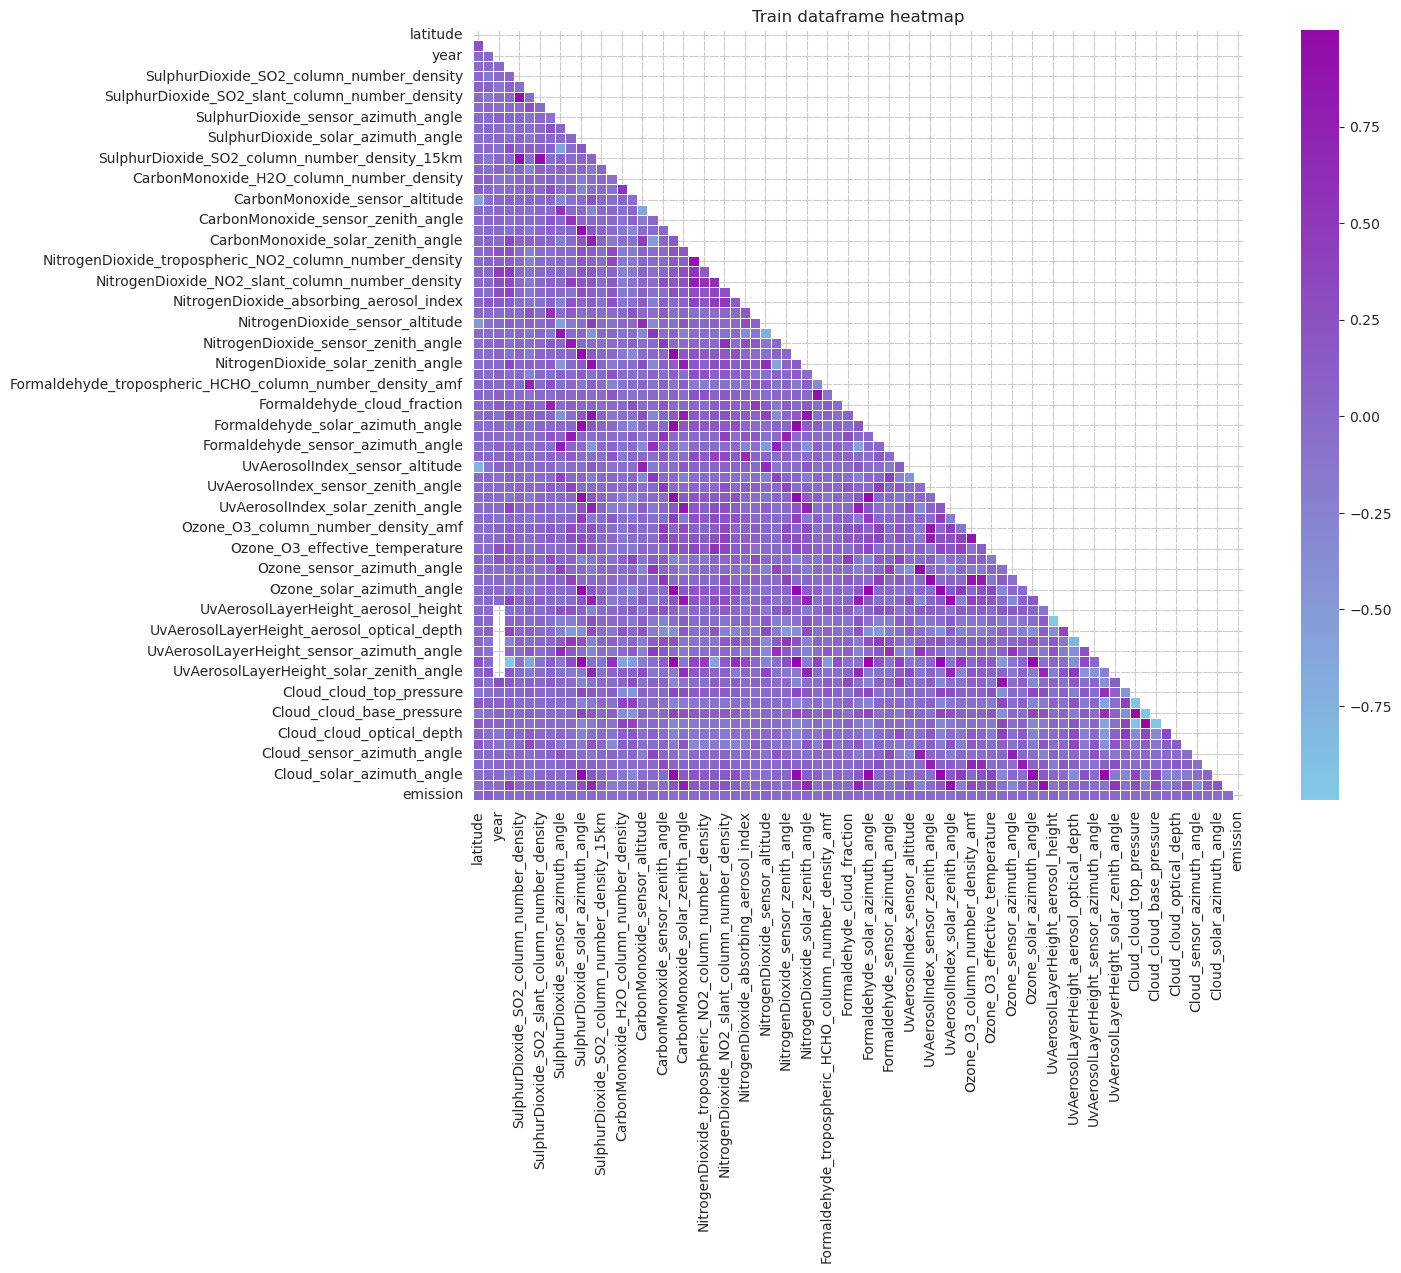

None

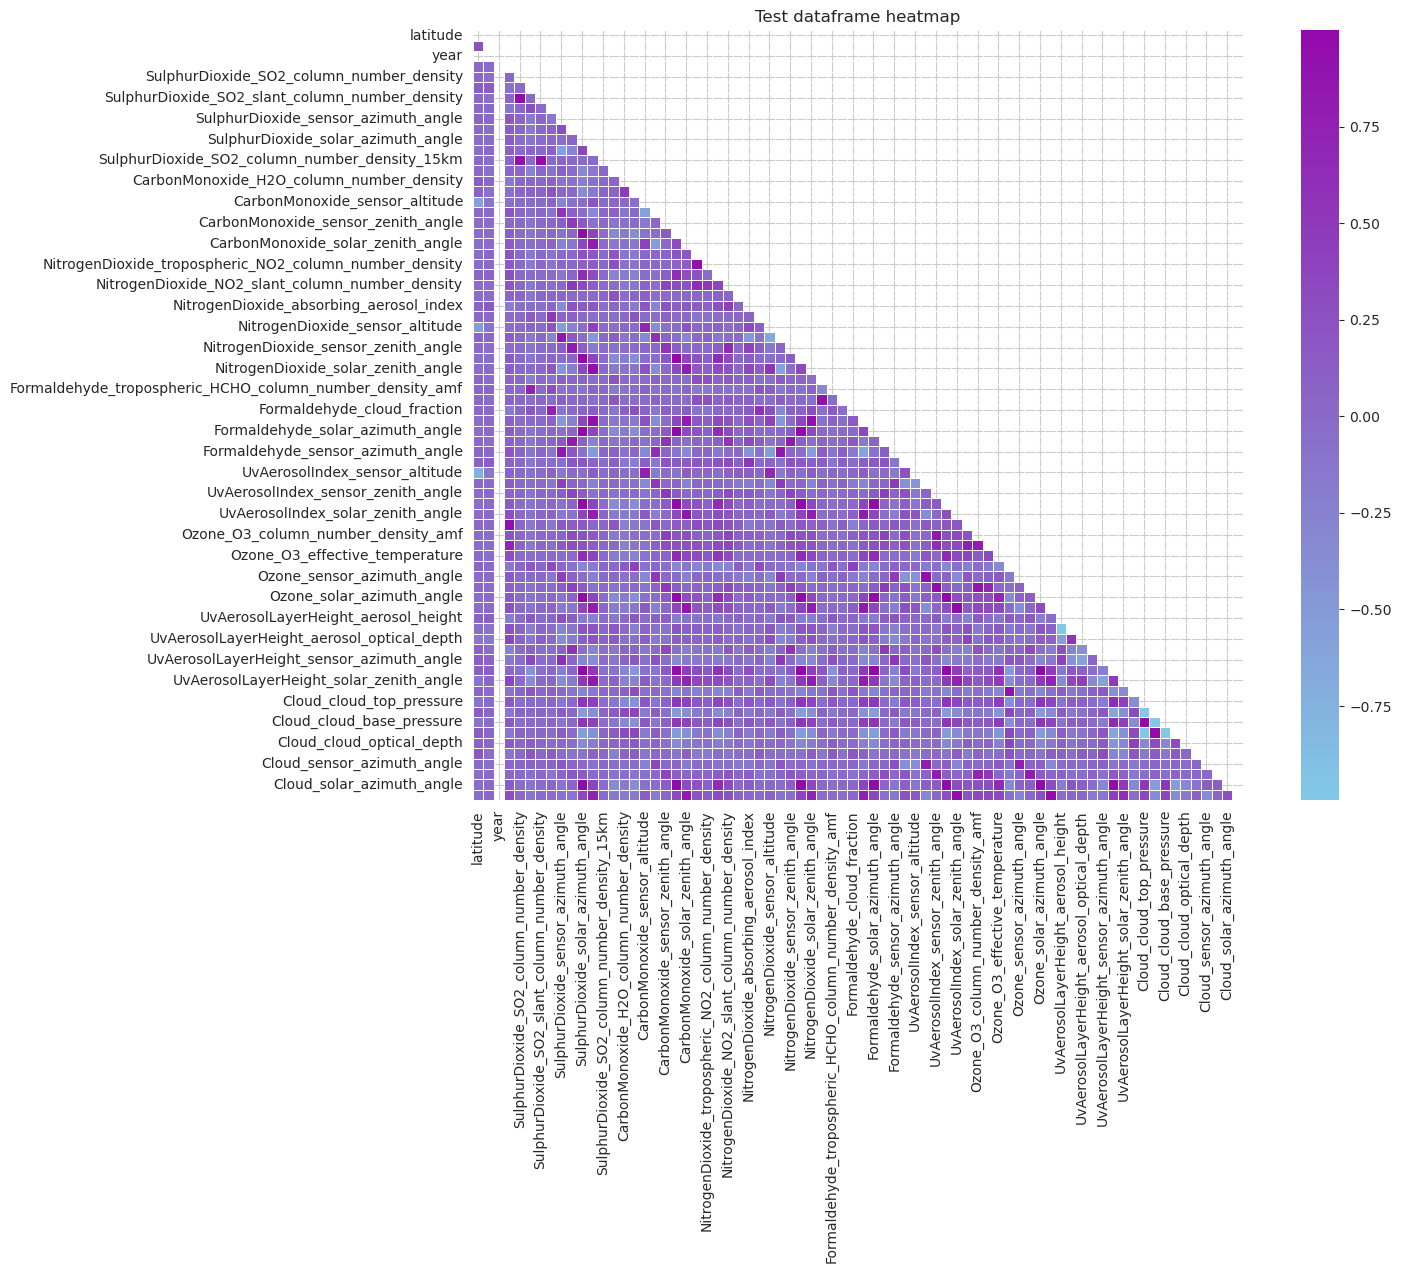

None

In [12]:
display(show_corr_heatmap(train_df, "Train dataframe heatmap"))
display(show_corr_heatmap(test_df, "Test dataframe heatmap"))

In [13]:
# SEEN IN: https://www.kaggle.com/code/yaaangzhou/en-playground-s3-e20-eda-modeling
fig = px.scatter_mapbox(train_df, lat="latitude", lon="longitude", animation_frame = "week_no", 
                        zoom=6.8, height=800, width=1000,) 
fig.update_layout(mapbox_style="open-street-map", title='Map')
fig.update_traces(marker=dict(color=PALETTE_7[0]))
fig.show()

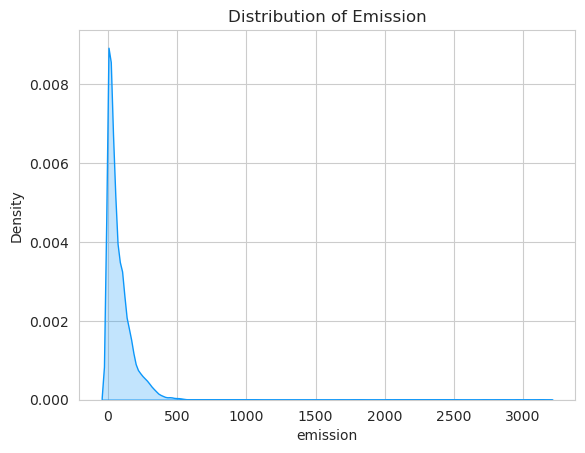

In [14]:
sns.kdeplot(data = train_df, x = "emission", fill = True, color = PALETTE_7_C[1]).set_title('Distribution of Emission');

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



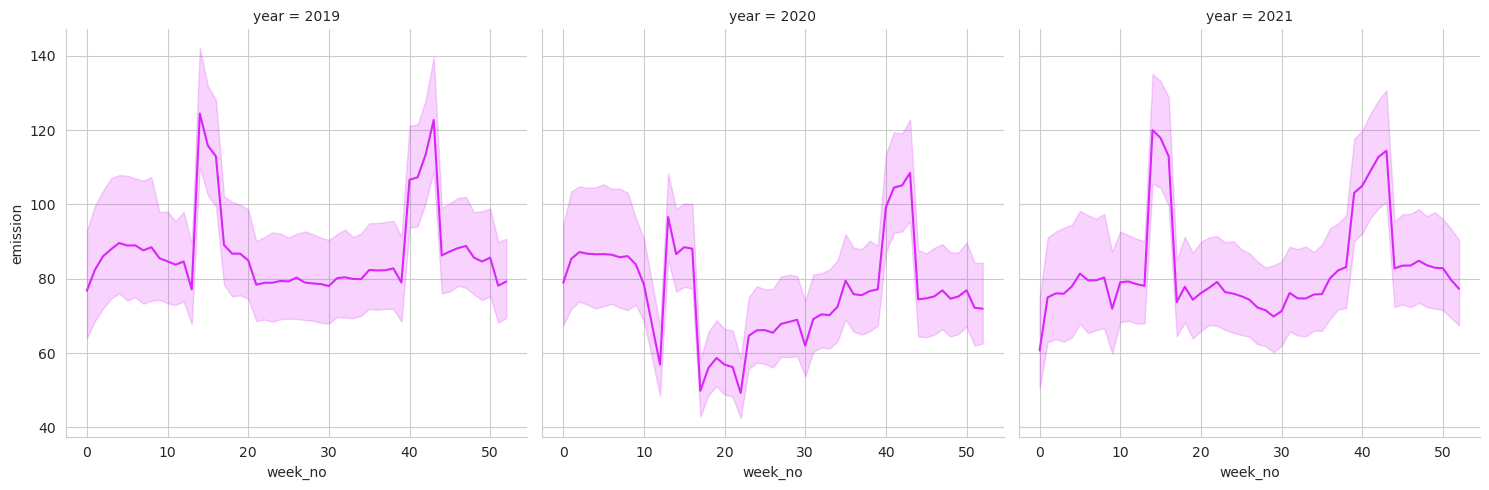

In [15]:
sns.relplot(data = train_df, x = "week_no", y = "emission", col = "year", kind = "line", color = PALETTE_7_C[2]);

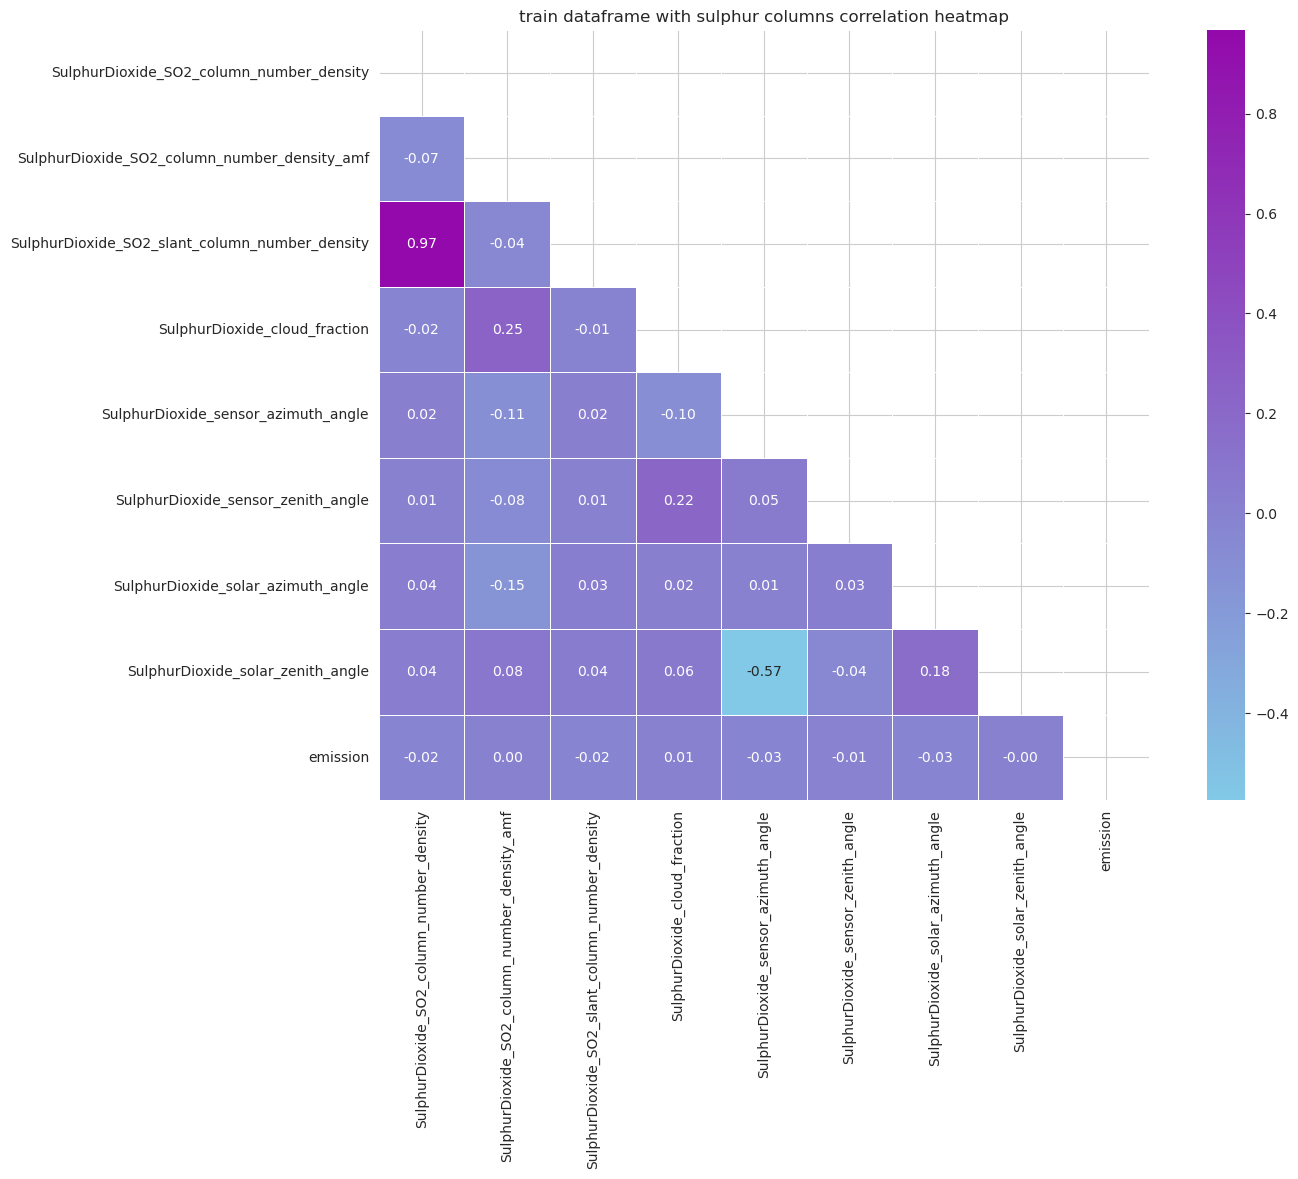

In [16]:
train_df_hm = train_df.loc[:, SULPHUR_COLS]
show_corr_heatmap(train_df_hm, "train dataframe with sulphur columns correlation heatmap")

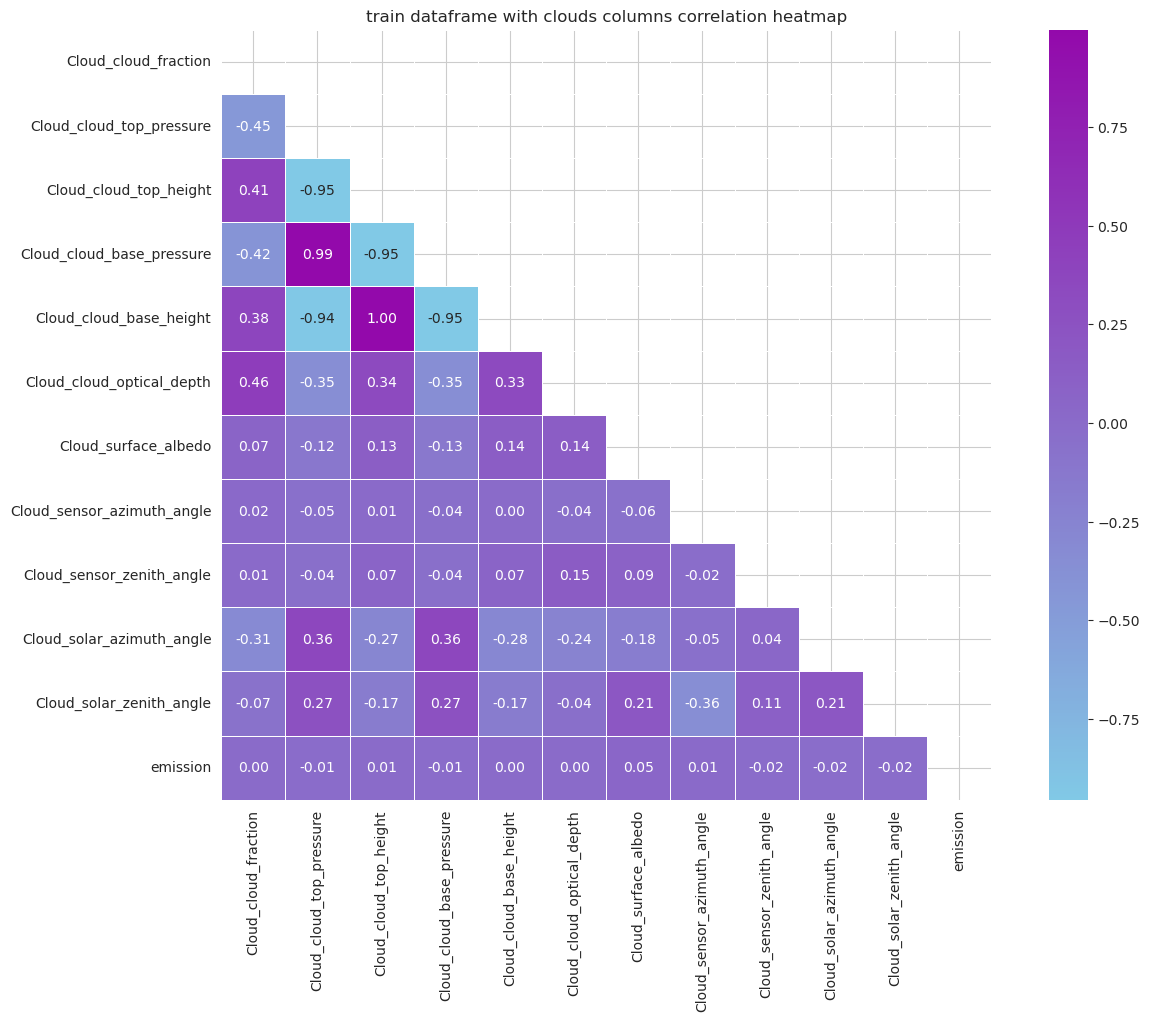

In [17]:
train_df_hm = train_df.loc[:, CLOUD_COLS]
show_corr_heatmap(train_df_hm, "train dataframe with clouds columns correlation heatmap")

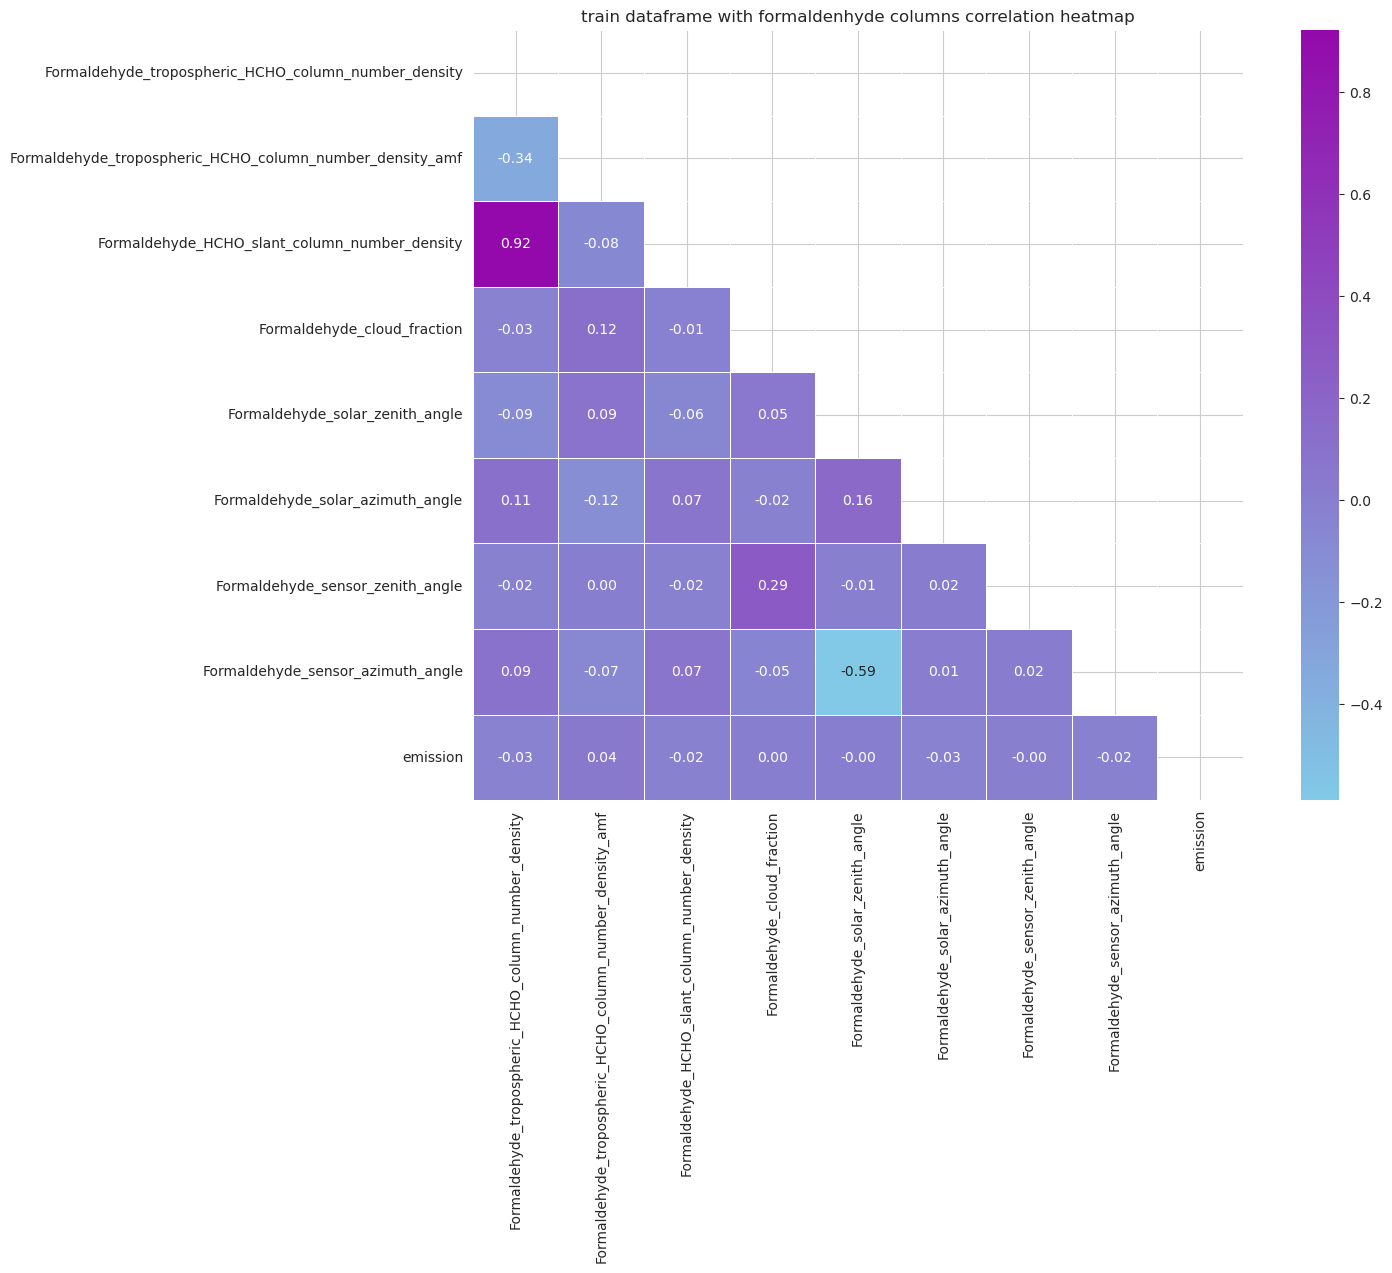

In [18]:
train_df_hm = train_df.loc[:, FORMALDEHYDE_COLS]
show_corr_heatmap(train_df_hm, "train dataframe with formaldenhyde columns correlation heatmap")

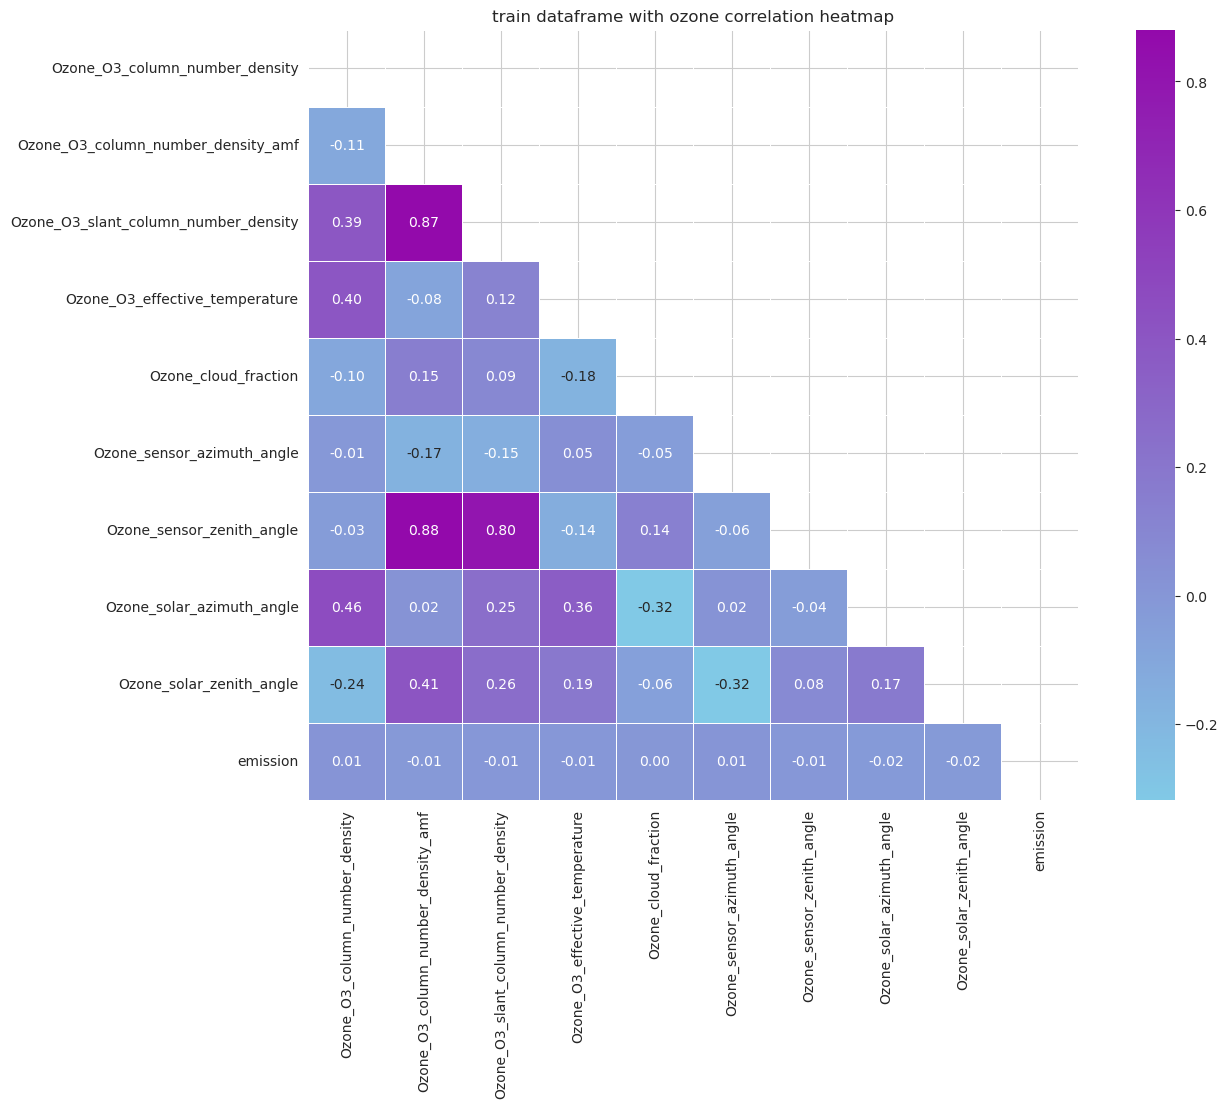

In [19]:
train_df_hm = train_df.loc[:, OZONE_COLS]
show_corr_heatmap(train_df_hm, "train dataframe with ozone correlation heatmap")

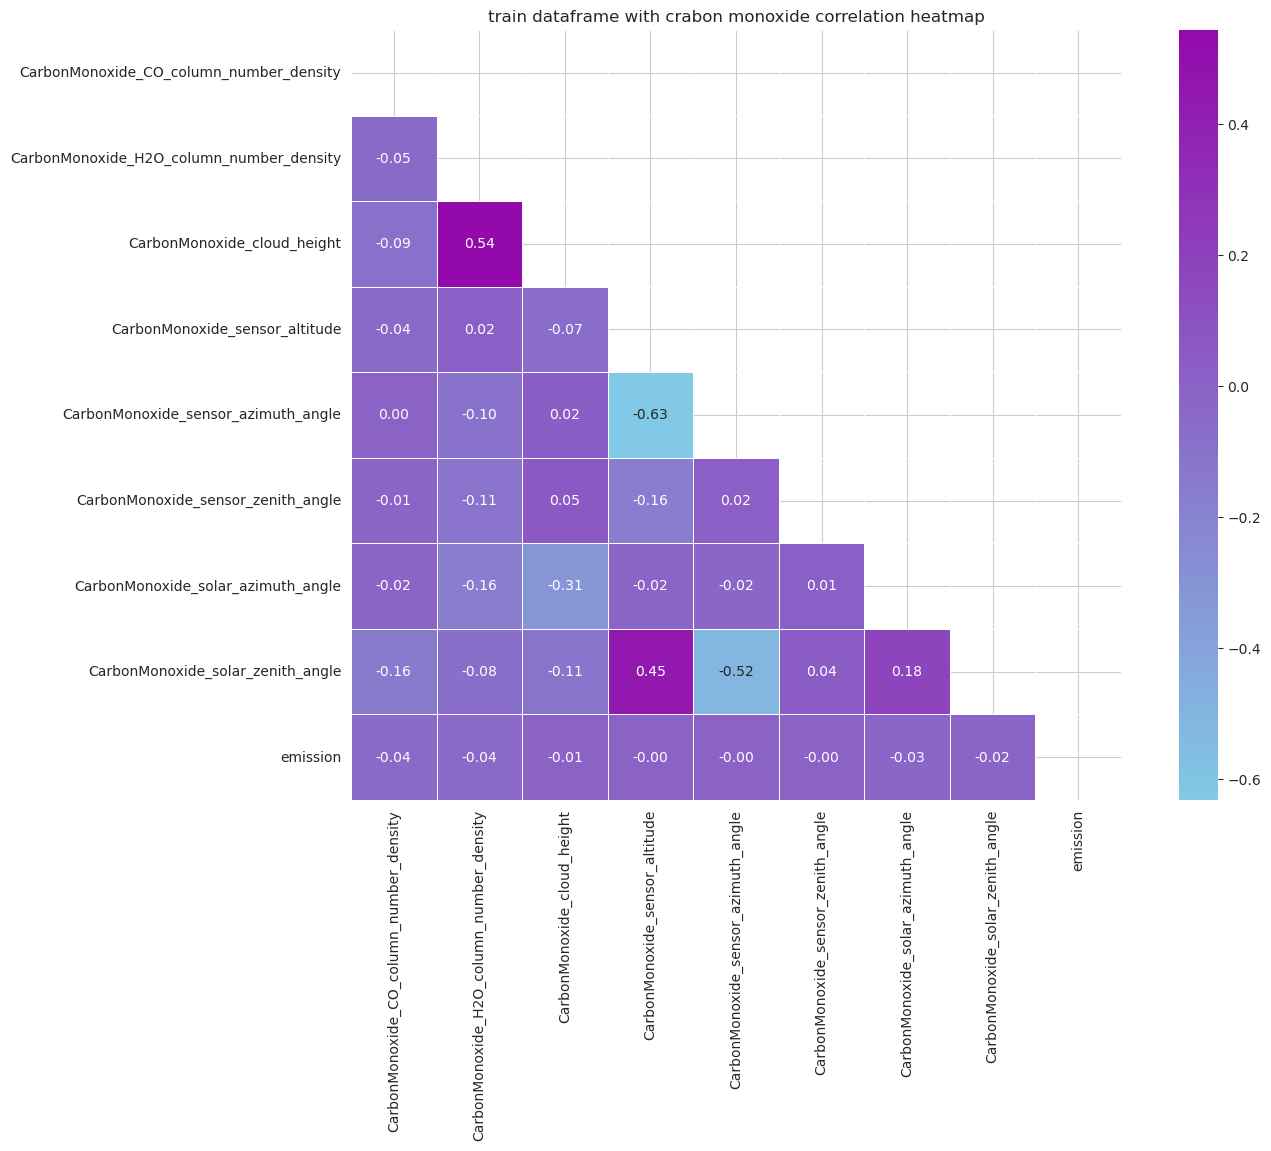

In [20]:
train_df_hm = train_df.loc[:, CARBON_COLS]
show_corr_heatmap(train_df_hm, "train dataframe with crabon monoxide correlation heatmap")

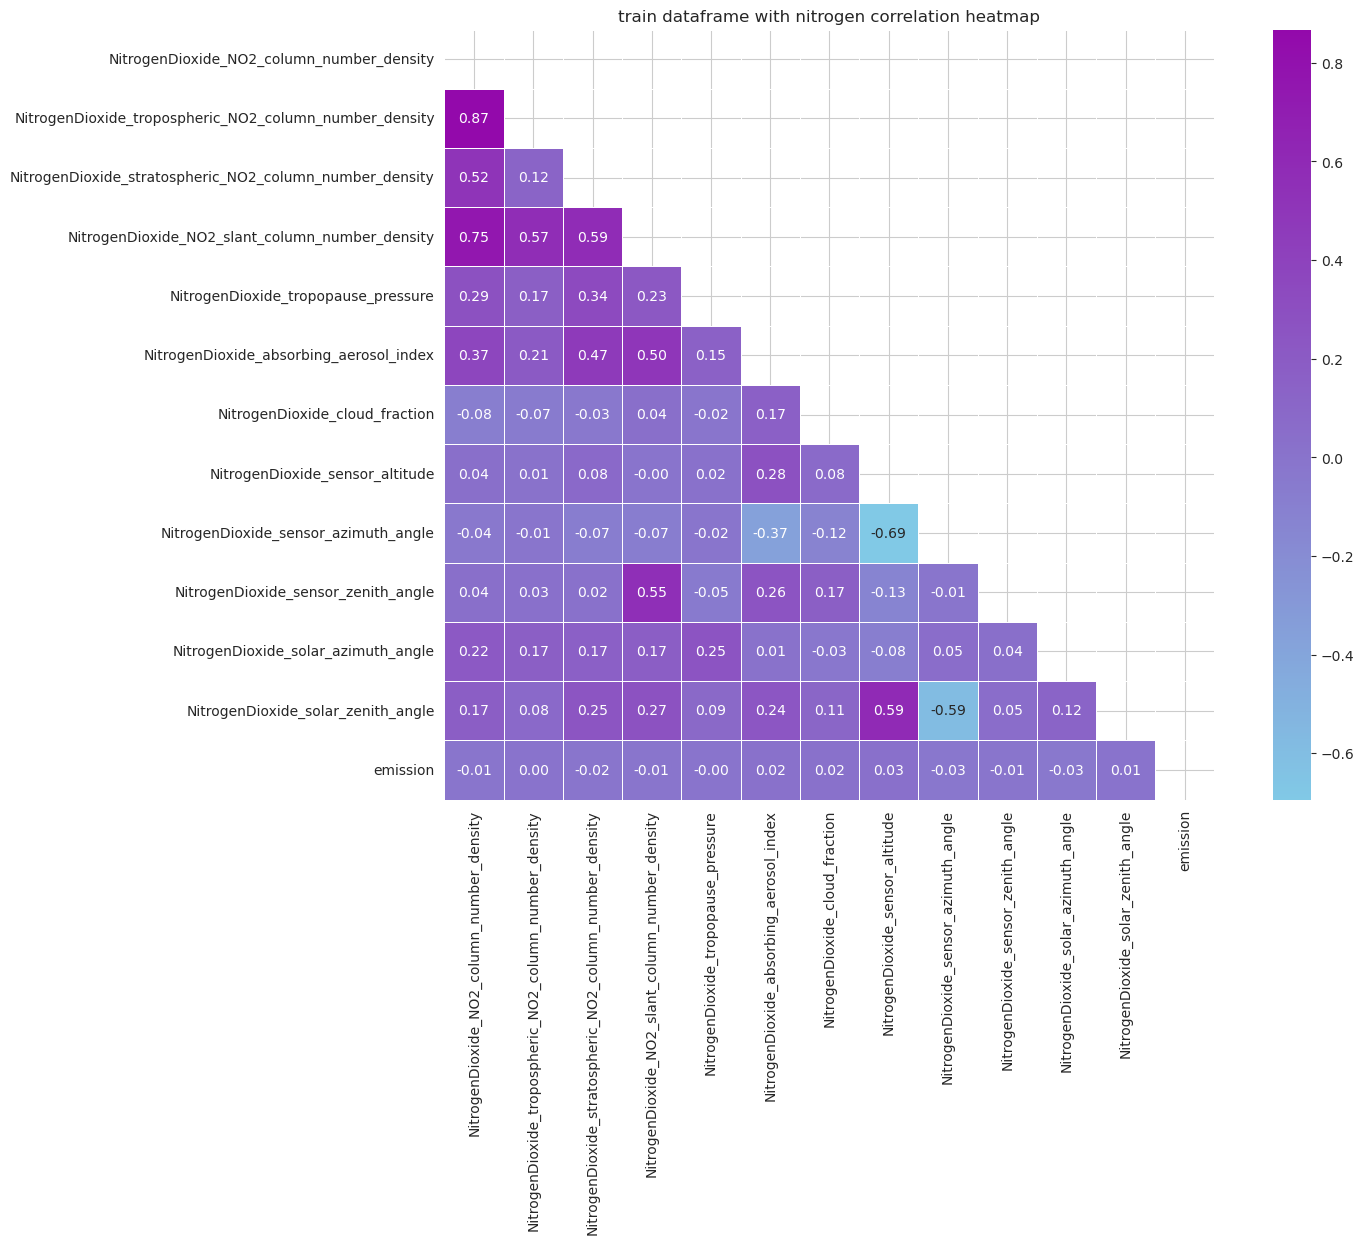

In [21]:
train_df_hm = train_df.loc[:, NITROGEN_COLS]
show_corr_heatmap(train_df_hm, "train dataframe with nitrogen correlation heatmap")